In [1]:
import numpy as np
import pandas as pd
import sys 
sys.path.append('../../')
import stateinterpreter.numerical_utils as nu
from stateinterpreter.io import plumed_to_pandas
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
colvar_path = '../../stateinterpreter/data/test-chignolin/COLVAR'
colvar = plumed_to_pandas(colvar_path)

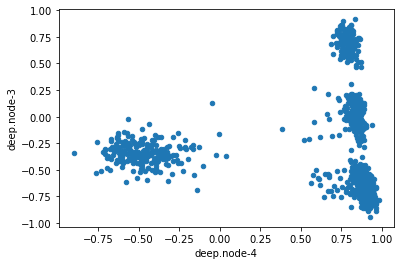

In [78]:
colvar.plot('deep.node-4', 'deep.node-3', kind='scatter')
empirical_centers = colvar[['deep.node-4', 'deep.node-3', 'deep.node-2']].to_numpy()

In [97]:
reload(nu)

<module 'stateinterpreter.numerical_utils' from '../../stateinterpreter/numerical_utils.py'>

In [98]:
KDE = nu.gaussian_kde(empirical_centers)
FES = lambda X: -KDE.logpdf(X)

In [100]:
local_minima_shgo = nu.local_minima(FES, [(-1,1),(-1,1),(-1,1)], method='shgo', method_kwargs = {'iters': 5})
#local_minima_brute = nu.local_minima(FES, [(-1,1),(-1,1),(-1,1)], method ='brute', method_kwargs = {'num_splits': 50})
local_minima_rand = nu.local_minima(FES, [(-1,1),(-1,1),(-1,1)], method='rand_brute', method_kwargs = dict())

In [103]:
local_minima_shgo

array([[ 0.90232122, -0.74693312, -0.52450381],
       [ 0.88344296, -0.60280649,  0.74989208],
       [ 0.88344356, -0.60279781,  0.75      ],
       [-0.48750922, -0.34563532,  0.0341212 ],
       [ 0.82657437,  0.0887174 ,  0.63336798],
       [ 0.78294542,  0.74185118,  0.51276661],
       [ 0.8435622 , -0.06950605, -0.63097979],
       [ 0.79411339,  0.6308547 , -0.69704636]])

In [104]:
local_minima_rand

array([[ 0.9023, -0.7469, -0.5245],
       [ 0.8834, -0.6028,  0.7499],
       [-0.4875, -0.3456,  0.0341],
       [ 0.8266,  0.0887,  0.6334],
       [ 0.7829,  0.7419,  0.5128],
       [ 0.8436, -0.0695, -0.631 ],
       [ 0.7941,  0.6309, -0.697 ]])

In [76]:
bounds = [(-1,1),(-1,1)]
num = 50
_1d_samples = [np.linspace(vmin,vmax,num) for (vmin, vmax) in bounds]

meshgrids = np.meshgrid(*_1d_samples)
sampled_positions = np.array([np.ravel(coord) for coord in meshgrids]).T
f = np.reshape(KDE(sampled_positions), (num,)*len(bounds))


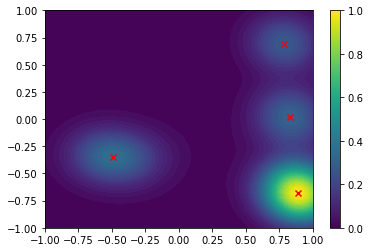

In [77]:
plt.contourf(X, Y, f, 50)
plt.scatter(local_minima[:,0], local_minima[:,1], color='red', marker='x')
plt.colorbar()